In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers.advanced_activations import ReLU, PReLU
from keras.optimizers import SGD, Adam
from scipy.stats import mode

In [197]:
train_x = pd.read_csv('train_x_2.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('test_x_2.csv')

In [198]:
from models import Model2KNN, Model2KMeans,Model3logistic

In [266]:
def predict_cv_classfier(model,train_x, train_y, test_x):
    

    preds = []
    preds_test = []
    va_idxes = []


    kf = KFold(n_splits=4, shuffle=True, random_state= 71)
    for i , (tr_idx, va_idx) in enumerate (kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    tmp = np.stack(preds_test, axis =1)
    mode_test, mode_counts = mode(tmp, axis=1)

    preds_test = mode_test
    preds_size = preds_test.shape[0]
    preds_test = preds_test.reshape(preds_size,)
    
    return pred_train, preds_test

In [267]:
model_2a = Model2KNN()
pred_train_2a, pred_test_2a = predict_cv_classfier(model_2a, train_x, train_y, test_x)

model_2b = Model2KMeans()
pred_train_2b, pred_test_2b = predict_cv_classfier(model_2b, train_x, train_y, test_x)

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:232: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  cust_array = []
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:232: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  cust_array = []
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:232: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  cust_array = []
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:232: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  cust_array = []


In [268]:
print(f'logloss: {log_loss(train_y,pred_train_2a , eps=1e-7): .4f}')
print(f'logloss:{log_loss(train_y, pred_train_2b, eps=1e-7): .4f}')

logloss:  1.1152
logloss: 1.2062


In [269]:
pred_train_2a.ndim

1

In [270]:
pred_test_2a.reshape(18050,)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [271]:
pred_test_2a.shape[0]

18050

In [272]:
train_x_3 = pd.DataFrame({'pred_2a': pred_train_2a, 'pred_2b': pred_train_2b})
test_x_3 = pd.DataFrame({'pred_2a': pred_test_2a, 'pred_2b': pred_test_2b})

In [282]:
train_x_3.to_csv('train_x_3.csv', index=False)
test_x_3.to_csv('test_x_3.csv', index=False)

In [273]:
test_x_3

,pred_2a,pred_2b
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18045,0,0
18046,0,0
18047,0,0
18048,0,0


In [274]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []
    
    kf = KFold(n_splits=4, shuffle=True, random_state=71)
    for i , (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)
        
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds)
    order = np.argsort(va_idxes)
    pred_train = preds[order]
    
    preds_test = np.mean(preds_test, axis=0)
    
    return pred_train, preds_test

In [275]:
model3 = Model3logistic()
pred_train_3 , pred_test_3 = predict_cv(model3, train_x_3, train_y, test_x_3)
print(f'logloss: {log_loss(train_y,pred_train_3, eps=1e-7):.4f}')

logloss: 0.2345


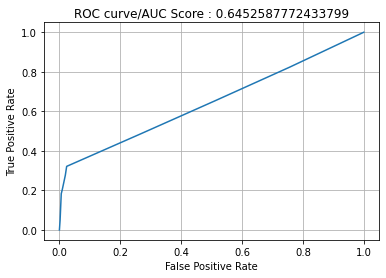

In [276]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred_train_3)
auc_score = roc_auc_score(train_y,pred_train_3)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [279]:
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
id = test['id']
pred = pd.DataFrame(pred_test_3)
submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.721273
1,1,0.055487
2,2,0.055487
3,3,0.055487
4,4,0.055487
...,...,...
18045,18045,0.055487
18046,18046,0.055487
18047,18047,0.055487
18048,18048,0.055487


In [280]:
submit.to_csv('stack2.csv',index=False,header=False)